In [1]:
cd "/content/drive/My Drive/Colab Notebooks/ml-dw-matrix/matrix_three"

/content/drive/My Drive/Colab Notebooks/ml-dw-matrix/matrix_three


In [2]:
!ls

data  day01.ipynb  day02.ipynb	day03.ipynb  day04.ipynb  logs


In [32]:
import pandas as pd
import numpy as np

import os
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [6]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [9]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
1088/1088 [==============================] - 5s 5ms/step - loss: 8.0412 - accuracy: 0.8011


In [0]:
def get_cnn_v1(input_shape, num_classes):
    return Sequential([
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax')        
    ])

def train_model(model, X_train, y_train, params_fit={}):
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    model.fit(
        X_train,
        y_train,
        batch_size=params_fit.get('batch_size', 128),
        epochs=params_fit.get('epochs', 5),
        verbose=params_fit.get('verbose', 1),
        validation_data=params_fit.get('validation_data', (X_train, y_train)),
        callbacks= [tensorboard_callback]
    )
    return model

In [15]:
model = get_cnn_v1(input_shape, num_classes)

model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 28.4902 - accuracy: 0.7244 - val_loss: 0.2594 - val_accuracy: 0.9384
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2238 - accuracy: 0.9470 - val_loss: 0.1578 - val_accuracy: 0.9587
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1467 - accuracy: 0.9638 - val_loss: 0.1358 - val_accuracy: 0.9676
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1364 - accuracy: 0.9674 - val_loss: 0.0752 - val_accuracy: 0.9799
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1021 - accuracy: 0.9770 - val_loss: 0.1215 - val_accuracy: 0.9701


In [16]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[4.9122844e-09, 2.7335863e-04, 1.7165266e-02, ..., 1.1262566e-04,
        6.5257192e-01, 2.9712868e-01],
       [3.1779112e-07, 4.7075856e-03, 2.0140031e-01, ..., 3.2074917e-03,
        3.7521444e-05, 2.5502482e-01],
       [9.7675638e-11, 5.3411342e-05, 1.0748110e-02, ..., 1.2689573e-05,
        9.6175742e-01, 1.5117665e-02],
       ...,
       [1.2712092e-03, 8.2418760e-03, 6.1331131e-03, ..., 8.2039078e-06,
        3.5885608e-04, 2.3029002e-03],
       [2.3081054e-03, 1.8267464e-02, 2.4002467e-03, ..., 7.7321802e-06,
        5.5901262e-05, 1.8925640e-04],
       [2.5026770e-03, 9.7565101e-03, 1.5536036e-02, ..., 1.6046240e-05,
        9.6588203e-04, 8.2654331e-04]], dtype=float32)

In [21]:
y_pred_prob[400]

array([2.3542362e-01, 7.2035134e-02, 6.6118958e-11, 5.5454895e-03,
       6.8699574e-01, 1.1939291e-08, 1.3931029e-26, 4.2297461e-16,
       2.2702011e-18, 8.5786399e-14, 7.0842257e-15, 2.5479458e-15,
       1.8266733e-09, 1.2494381e-16, 1.0542638e-27, 2.7842524e-22,
       8.6263286e-16, 8.4545613e-27, 3.8999094e-17, 5.1363183e-24,
       1.6177180e-18, 4.1475966e-19, 6.2158657e-33, 2.6655997e-18,
       2.1693374e-15, 1.1167646e-22, 4.1046614e-14, 3.9199057e-27,
       7.8399972e-15, 5.4009797e-23, 0.0000000e+00, 1.5213511e-20,
       7.8063218e-18, 0.0000000e+00, 0.0000000e+00, 2.6930074e-36,
       7.1497483e-34, 0.0000000e+00, 2.4720541e-28, 0.0000000e+00,
       7.2790605e-35, 5.4679275e-20, 1.1132767e-22], dtype=float32)

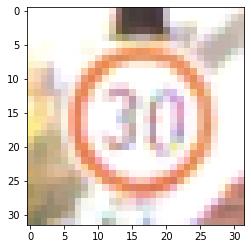

In [20]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [24]:
np.argmax(y_pred_prob[400])

4

In [25]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (70km/h)'

In [26]:
np.sum(
    [
        2.3542362e-01, 7.2035134e-02, 6.6118958e-11, 5.5454895e-03,
        6.8699574e-01, 1.1939291e-08, 1.3931029e-26, 4.2297461e-16,
        2.2702011e-18, 8.5786399e-14, 7.0842257e-15, 2.5479458e-15,
        1.8266733e-09, 1.2494381e-16, 1.0542638e-27, 2.7842524e-22,
        8.6263286e-16, 8.4545613e-27, 3.8999094e-17, 5.1363183e-24,
        1.6177180e-18, 4.1475966e-19, 6.2158657e-33, 2.6655997e-18,
        2.1693374e-15, 1.1167646e-22, 4.1046614e-14, 3.9199057e-27,
        7.8399972e-15, 5.4009797e-23, 0.0000000e+00, 1.5213511e-20,
        7.8063218e-18, 0.0000000e+00, 0.0000000e+00, 2.6930074e-36,
        7.1497483e-34, 0.0000000e+00, 2.4720541e-28, 0.0000000e+00,
        7.2790605e-35, 5.4679275e-20, 1.1132767e-22
    ]
)

0.9999999973322311

<BarContainer object of 43 artists>

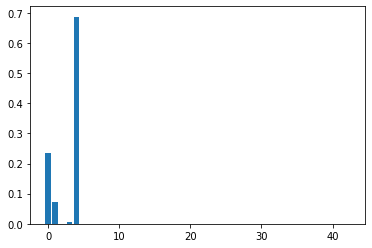

In [28]:
plt.bar(range(43), y_pred_prob[400])

In [31]:
print(labels_dict[0])
print(labels_dict[1])
print(labels_dict[3])

Speed limit (20km/h)
Speed limit (30km/h)
Speed limit (60km/h)


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
    y_test_norm = np.argmax(y_test, axis=1)

    y_pred_prob = model_trained.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    return scoring(y_test_norm, y_pred)

In [39]:
predict(model_trained, X_test, y_test)

0.8201814058956917

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(input_shape, num_classes):
    return Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.3),    
        Dense(num_classes, activation='softmax')        
    ])

In [45]:
train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 4.4380 - accuracy: 0.3416 - val_loss: 1.0851 - val_accuracy: 0.7426
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 1.0450 - accuracy: 0.6887 - val_loss: 0.4313 - val_accuracy: 0.9035
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5774 - accuracy: 0.8265 - val_loss: 0.1913 - val_accuracy: 0.9563
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3914 - accuracy: 0.8844 - val_loss: 0.0975 - val_accuracy: 0.9797
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2875 - accuracy: 0.9140 - val_loss: 0.0713 - val_accuracy: 0.9856


0.916780045351474

In [0]:
def get_cnn_v3(input_shape, num_classes):
    return Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),        
        MaxPool2D(),
        Dropout(0.3),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.3),    
        Dense(num_classes, activation='softmax')        
    ])

In [47]:
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 1.9815 - accuracy: 0.5418 - val_loss: 0.3481 - val_accuracy: 0.9235
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.4981 - accuracy: 0.8525 - val_loss: 0.1325 - val_accuracy: 0.9736
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2910 - accuracy: 0.9135 - val_loss: 0.0617 - val_accuracy: 0.9875
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2007 - accuracy: 0.9403 - val_loss: 0.0346 - val_accuracy: 0.9921
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1382 - accuracy: 0.9593 - val_loss: 0.0225 - val_accuracy: 0.9953


0.9757369614512472

In [52]:
def get_cnn_v4(input_shape, num_classes):
    return Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),        
        MaxPool2D(),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),        
        MaxPool2D(),
        Dropout(0.3),        
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.3),    
        Dense(num_classes, activation='softmax')        
    ])

#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6045 - accuracy: 0.2933 - val_loss: 1.0420 - val_accuracy: 0.7017
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.8868 - accuracy: 0.7247 - val_loss: 0.2257 - val_accuracy: 0.9374
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.4206 - accuracy: 0.8709 - val_loss: 0.0996 - val_accuracy: 0.9688
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2882 - accuracy: 0.9136 - val_loss: 0.0825 - val_accuracy: 0.9733
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1994 - accuracy: 0.9395 - val_loss: 0.0467 - val_accuracy: 0.9856


0.9625850340136054

In [53]:
def get_cnn_v5(input_shape, num_classes):
    return Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),        
        MaxPool2D(),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),        
        MaxPool2D(),
        Dropout(0.3),        
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        Dense(1024, activation='relu'),
        Dropout(0.3),         
        Dense(num_classes, activation='softmax')        
    ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.2717 - accuracy: 0.3564 - val_loss: 0.6652 - val_accuracy: 0.7808
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.6241 - accuracy: 0.8038 - val_loss: 0.1476 - val_accuracy: 0.9511
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2990 - accuracy: 0.9072 - val_loss: 0.0738 - val_accuracy: 0.9785
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1991 - accuracy: 0.9412 - val_loss: 0.0426 - val_accuracy: 0.9881
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1540 - accuracy: 0.9553 - val_loss: 0.0328 - val_accuracy: 0.9905


0.9693877551020408

In [54]:
X_train[0].shape

(32, 32, 3)

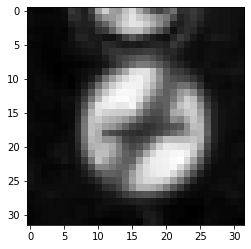

In [57]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [63]:
model6 = get_cnn_v5((32, 32, 1), num_classes)
model6_trained = train_model(model6, X_train_gray, y_train, params_fit={})
predict(model6_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.7442 - accuracy: 0.2336 - val_loss: 0.7464 - val_accuracy: 0.7737
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5700 - accuracy: 0.8189 - val_loss: 0.1249 - val_accuracy: 0.9604
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2644 - accuracy: 0.9144 - val_loss: 0.0643 - val_accuracy: 0.9811
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1793 - accuracy: 0.9441 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1372 - accuracy: 0.9572 - val_loss: 0.0250 - val_accuracy: 0.9931


0.9657596371882086

In [0]:
def preproc_img(img):
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)
    return img

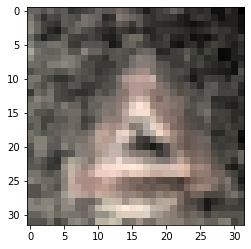

In [65]:
plt.imshow(preproc_img(X_train[400]))

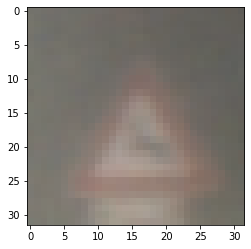

In [66]:
plt.imshow(X_train[400])

In [0]:
#X_train_prp = X_train.copy().astype(np.float32)
#X_test_prp = X_test.copy().astype(np.float32)

#for i in tqdm(range(X_train.shape[0])):
#    X_train_prp[i] = preproc_img(X_train[i])

In [74]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    .gitkeep
	modified:   day01.ipynb
	modified:   day02.ipynb
	modified:   day03.ipynb
	modified:   ../matrix_two/day02.ipynb
	modified:   ../matrix_two/day03.ipynb
	modified:   ../matrix_two/day05.ipynb
	modified:   ../matrix_two/day_04.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	day04.ipynb
	logs/

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add